<a href="https://colab.research.google.com/github/ye-bhee-theek-ha/AI-course-Lab/blob/master/K_means_and_K_medoids_Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [6]:
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])


In [7]:
def initialize_centroids(data, k):
    """Randomly initialize the centroids from the data points."""
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    return centroids

def compute_distances(data, centroids):
    """Compute the distances between each data point and centroids."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return distances

def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    clusters = np.argmin(distances, axis=1)
    return clusters

def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of the points in each cluster."""
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [8]:
k = 4
centroids, clusters = k_means(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares:", wcss)

Total within-cluster sum of squares: 17.46619760906058


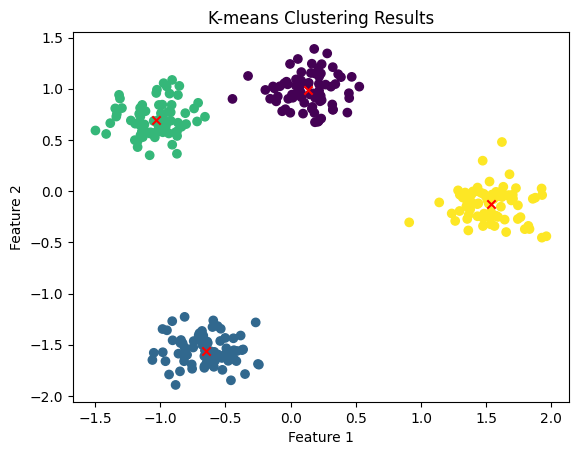

In [9]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [10]:
def initialize_medoids(data, k):
    """Randomly initialize the medoids from the data points."""
    medoids = data[np.random.choice(data.shape[0], k, replace=False)]
    return medoids

def compute_dissimilarities(data, medoids):
    """Compute the dissimilarities between each data point and medoids."""
    dissimilarities = np.sum(np.abs(data[:, np.newaxis] - medoids), axis=2)
    return dissimilarities

def assign_clusters(dissimilarities):
    """Assign each data point to the closest medoid."""
    clusters = np.argmin(dissimilarities, axis=1)
    return clusters

def update_medoids(data, clusters, k):
    """Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster."""
    medoids = np.array([data[clusters == i][np.argmin(np.sum(compute_dissimilarities(data[clusters == i], data[clusters == i][:, np.newaxis]), axis=1))] for i in range(k)])
    return medoids

def k_medoids(data, k, max_iterations=100):
    """Implement the K-medoids clustering algorithm."""
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters


In [11]:
medoids_kmedoids, clusters_kmedoids = k_medoids(data_scaled, k)
total_dissimilarity = np.sum([np.sum(compute_dissimilarities(data_scaled[clusters_kmedoids == i], medoids_kmedoids[i])) for i in range(k)])
print("Total within-cluster sum of squares (K-medoids):", total_dissimilarity)


Total within-cluster sum of squares (K-medoids): 266.8960087768211


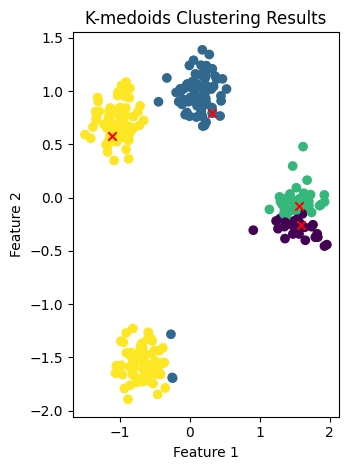

In [12]:
# Visualize the clusters for K-medoids
plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_kmedoids, cmap='viridis')
plt.scatter(medoids_kmedoids[:, 0], medoids_kmedoids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')

plt.tight_layout()
plt.show()